In [3]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [5]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [6]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

,Date,Mean_Temperature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


When a time series exhibits seasonality of a known time period of m time indices, it can be stationarized by taking seasonal differences between xt and xt-m. These differences taken at lags of length m are indicative of the seasons or quarters in a year.

In [7]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [8]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

,Mean_Temperature
Date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


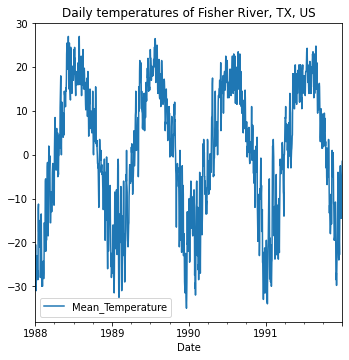

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
# plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)
plt.show()

In [10]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

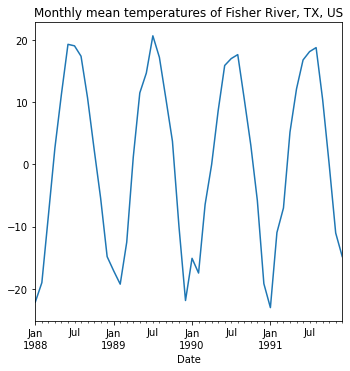

In [11]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
# plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)
plt.show()

The ACF of the monthly mean temperature of Fisher River swings above and below the 99% confidence intervals for several lags.
Therefore, the monthly mean temperatures form a non-stationary time series due to seasonality.

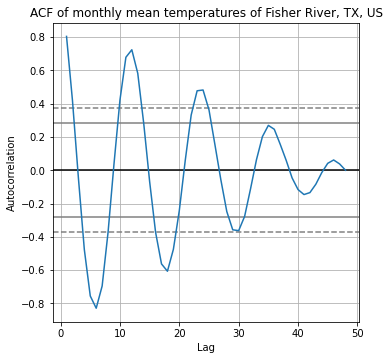

In [13]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)
# plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)
plt.show()

In [29]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
dif = 12
seasonal_diff = monthly_mean_temp.diff(dif)
seasonal_diff = seasonal_diff[dif:]

The preceding line of code returns seasonal_diff, which is a pandas.Series. The seasonal differencing leaves null values in its first 12 elements, which are removed before further analysis:

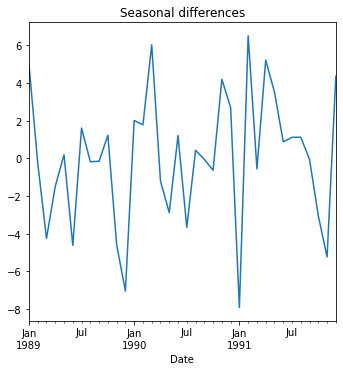

In [30]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
# plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)
plt.show()

We again use the autocorrelation_plot function to generate the ACF of the differenced series and the confidence intervals at 99% of confidence level. We can see in the following figure that the ACF never crosses the 99% confidence intervals for lags varying from 0 to over 35

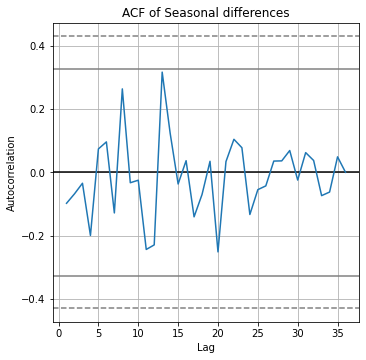

In [31]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)
# plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)
plt.show()

The actual p-values are confirmed by running the stattools.acf function on the monthly mean data as follows:

In [32]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


E:\programs\python\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [33]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


At this point, it is important to note that in some cases a first-order differencing is done after running the seasonal differences to achieve stationarity in the transformed data